# GeeksForGeeks Data Analysis 

## All Imports

In [1]:
import pandas
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup

### -Importing Dataset

In [2]:
df=pandas.read_csv("medals.csv")

## Exploring The Data

In [3]:
df.columns

Index(['discipline_title', 'slug_game', 'event_title', 'event_gender',
       'medal_type', 'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')

In [4]:
df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [5]:
df.describe()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
count,21697,21697,21697,21697,21697,21697,6584,17027,18073,21697,20195,21697
unique,86,53,1436,4,3,2,493,12116,12895,154,143,154
top,Athletics,tokyo-2020,Individual men,Men,BRONZE,Athlete,United States team,https://olympics.com/en/athletes/michael-phelp...,Michael PHELPS,United States of America,US,USA
freq,3080,1188,215,13932,7529,15113,523,16,16,3094,3094,3094


### -Checking For Possible Values Of Some Columns

In [6]:
# possible values of participant_type
set(df.participant_type)

{'Athlete', 'GameTeam'}

In [7]:
# possible values of event_gender
set(df.event_gender)

{'Men', 'Mixed', 'Open', 'Women'}

In [8]:
# possible values of medal_type
set(df.medal_type)

{'BRONZE', 'GOLD', 'SILVER'}

## Preprocessing The Data

### -Cleaning The Data

In [9]:
# Checking for null values
for i in df.columns:
    if df[i].isnull().any():
        print(i)

participant_title
athlete_url
athlete_full_name
country_code


In [10]:
df['participant_title'].isnull().sum()

15113

In [11]:
df['participant_title'].size

21697

<Axes: >

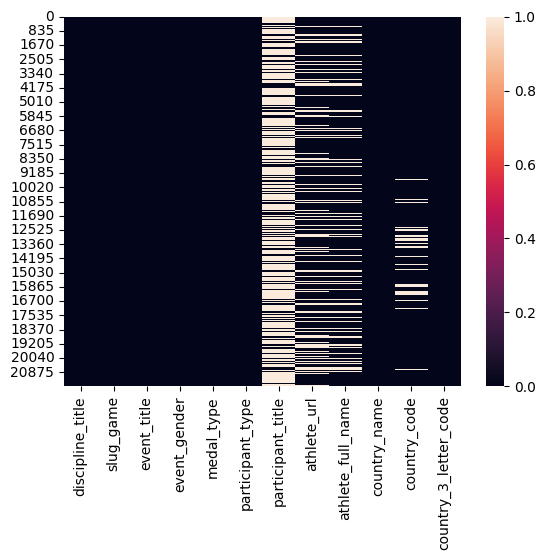

In [12]:
# Checking all null values more clearly
sns.heatmap(df.isnull())
# We can fill up country codes later on as we have 3 letter code, so for now, we will ignore that and fix the others

In [13]:
# common nulls between participant title and athlete full name and athlete url
p_af_url=0
# common nulls between participant title and athlete full name
p_af=0
# common nulls between participant title and athlete url
p_url=0
for i in df.index:
    if str(df['participant_title'][i])=="nan" and str(df['athlete_full_name'][i])=="nan" and str(df['athlete_url'][i])=="nan":
        p_af_url+=1
    elif str(df['participant_title'][i])=="nan" and str(df['athlete_full_name'][i])=="nan":
        p_af+=1
    elif str(df['participant_title'][i])=="nan" and str(df['athlete_url'][i])=="nan":
        p_url+=1  

In [14]:
print(p_af_url)
print(p_url)
print(p_af)

0
888
0


### Filling up blank athlete_full_names with athlete_url

In [15]:
def to_camel_case(text):
    newString=""
    for ind,i in enumerate(text):
        if ind==0:
            newString+=i.upper()
        else:
            newString+=i
    return newString

# Athlete names
for i in df.index:
    athleteUrl=df['athlete_url'][i]
    
#     A reason is given below in the markdown for this
    if type(athleteUrl)!=float and type(df['athlete_full_name'][i])==float:
        
#         Removing unnecessary parts
        athleteUrl=athleteUrl.replace("https://olympics.com/en/athletes/","")
        athleteUrl=athleteUrl.replace("-"," ")
        athleteName=""
#         Working with string cases
        athleteUrl=athleteUrl.split(" ")
#     Camel case
        if len(athleteUrl)==1:
            athleteName=to_camel_case(athleteUrl[0])
        else:
            
            for ind,name in enumerate(athleteUrl):
                if ind==0:
                    athleteName+=to_camel_case(athleteUrl[0])+" "
                else:
#                     Capital case

                    if ind!=len(athleteUrl)-1:
                        athleteName+=name.upper()+" "
                    else:
                        athleteName+=name.upper()
            
#         print(athleteName)
        df['athlete_full_name'][i]=athleteName        


In the above code, we have mentioned a condition like 
#### if type(athleteUrl)!=float and type(df['athlete_full_name'][i])==float
This suggests that we only want to fill up the athlete names which are not prefilled, and we also want to ignore the NULL urls

In [16]:
# Checking for any single word names (names without title)
for i in df.index:
    if type((df.athlete_full_name[i]))!=float:
        if len(df.athlete_full_name[i].split(" "))==1:
            print(i)
# There are no such values

### Filling up blank participant_titles with athlete_full_name

In [26]:
count=0
for i in df.index:
    a=df.participant_title[i]
    if type(a)!=float:
        print(i," ",a)
        count+=1
    if count==250:
        break
        
# We can see , we need to substitude the null values of participant_titles with country name + " team"
# as we dont know whether its a duo or not, or what are their names.

0   Italy team
1   Italy team
2   Norway team
3   Norway team
4   Sweden team
5   Sweden team
6   Great Britain team
7   Japan team
8   Sweden team
9   Sweden team
10   Great Britain team
11   Canada team
12   Canada team
13   Sweden team
14   Japan team
15   New Zealand team
16   United States of America team
17   United States of America team
18   Sweden team
19   Norway team
20   United States of America team
21   ROC team
22   Switzerland team
23   Switzerland team
24   Switzerland team
25   People's Republic of China team
26   France team
27   United States of America team
28   Australia team
29   ROC team
30   United States team
31   China team
32   Canada team
33   Canada team
34   Sweden team
35   Germany team
36   ROC team
37   People's Republic of China team
38   Ukraine team
39   Belarus team
40   People's Republic of China team
41   United States of America team
42   Canada team
43   People's Republic of China team
44   Canada team
45   People's Republic of China team
46   

In [18]:
for i in df.index:
    countryN=df.country_name[i]
    if type(countryN)!=float and type(df.participant_title[i])==float:
        df.participant_title[i]=countryN+" team"

#     Also filling the rows which have country names but not the word "team"
    if type(countryN)!=float:
        if df.participant_title[i]!=float and "/" not in df.participant_title[i] and "team" not in df.participant_title[i]:
            df.participant_title[i]+=" team"
        

In [23]:
df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden team,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [20]:
df['athlete_full_name'].isnull().sum()

3624

<Axes: >

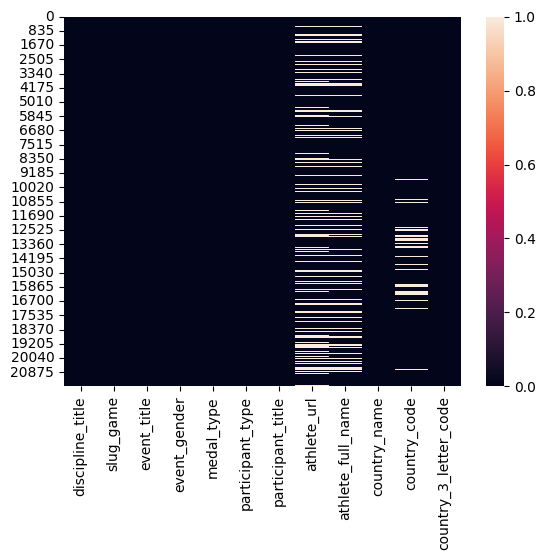

In [22]:
# Using heatmap again to check the progress
sns.heatmap(df.isnull())

## Team members:

#### Shibam Roy 
role: Data Analyst
#### Ankush Roy
role: Data Analyst
#### Debdutta Barman 
role: Frontend developer